# Experiment Design

```Our sample was obtained through a Google Form survey. This survey was shared to people from the targeted audience, specifically university students aged between 20 and 24 attending Concordia University.

Initially, participants were asked about their technology use before bedtime, including the duration before sleep they typically ceased using their phones and the activities they engaged in on their devices. This information provided insights into participants' exposure to electronic devices and potentially stimulating content preceding sleep.

Furthermore, participants were queried about their sleep patterns and behaviors, such as where they habitually placed their phones before sleep, the time it took them to fall asleep, the frequency of nighttime awakenings, and the average nightly duration of sleep. These questions aimed to capture the duration and quality of participants' sleep, as well as any disturbances affecting sleep continuity.

Moreover, participants were requested to rate their average sleep quality, providing subjective feedback on their overall sleep experience. This rating helped quantify participants' perceptions of their sleep, ranging from feeling refreshed and ready to start the day to frequently feeling tired and unrested.

Additionally, participants were invited to disclose any underlying conditions that might influence their sleep quality, such as anxiety or ADHD. Understanding the presence of such conditions helped contextualize individual differences in sleep patterns and responses to technology use.

Finally, participants were asked about their typical sleep environment and exercise habits, as these factors could also impact sleep quality.

Our form was open from April 3rd at 7am to April 4th at 1pm. In this interval of time, we received 57 responses to our survey. Due to the nature of an online survey, the responses we collected were subjective. Since it is difficult for respondents to measure the quality and quantity of sleep on their own there is a large amount of subjectivity in our results.
```


In [80]:
# Setup Project Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option(
  "display.max_columns", 200
)  # display up to 200 columns (removes '...' hidden columns)

In [81]:
# Read in Data and Display Shape (rows, columns)
df = pd.read_csv("survey_data.csv")
df.shape

(55, 13)

In [82]:
# Drop the columns that don't agree with the Confidentiality Agreement
if "Agreement of Confidentiality" in df.columns:
  df = df[
    df["Agreement of Confidentiality"]
    == "I agree that the information submitted will be kept confidential, and abide by the terms of confidentiality and anonymity."
  ].reset_index(drop=True)

# Drop the Timestamp, Agreement of Confidentiality and Feedback columns
try:
  df = df.drop(
    columns=[
      "Timestamp",
      "Agreement of Confidentiality",
      "Any thoughts you would like to add? (Optional)",
    ],
    axis=1,
  )
except KeyError:
  pass

# Rename Columns
df = df.rename(
  columns={
    "How long before you go to sleep do you usually stop using your phone, on a regular basis?": "end_of_phone_usage",
    "What do you do on your phone before going to sleep?": "end_of_phone_usage_activity",
    "Where do you usually put your phone right before you go to sleep?": "phone_placement",
    "How long does it take you to fall asleep?": "time_to_fall_asleep",
    "How often do you wake up during the night?": "night_wakeups",
    "How many hours of sleep do you get per night on average?": "hours_of_sleep",
    "How would you rate your average sleep quality? \n(ex: waking up feeling refreshed and ready to start the day, or often feel tired and like you didn't sleep well)?": "sleep_quality",
    "Do you have any underlying conditions that may affect the quality of your sleep? (ex: Anxiety, ADHD, etc.)": "underlying_conditions",
    "Please check all of the following that apply to your typical sleep environment:": "sleep_environment",
    "How often do you exercise?": "exercise_frequency",
  }
)

# Distribution Graphs Based on Device Usage


Category: < 30 minutes
   Count (n): 42
   Mean (mu): 6.738095238095238
   Standard Deviation: 1.2546963929767045

Category: 30 minutes - 1 hour
   Count (n): 8
   Mean (mu): 6.875
   Standard Deviation: 1.0532687216470449

Category: > 1 hour
   Count (n): 5
   Mean (mu): 6.8
   Standard Deviation: 1.32664991614216



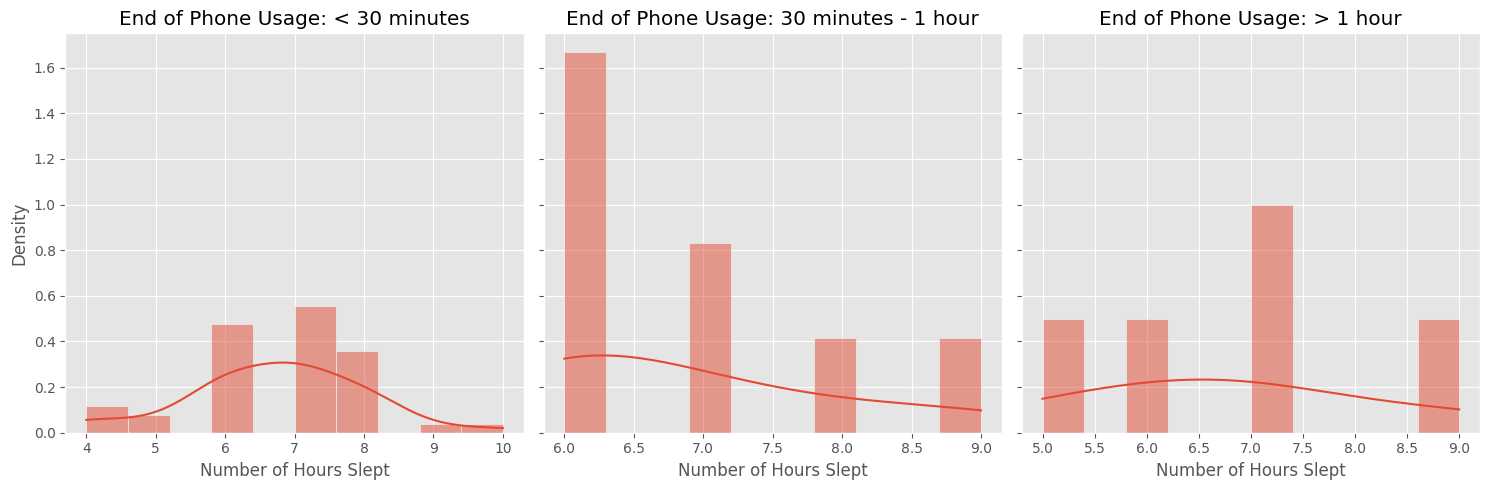

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define the categories for end_of_phone_usage
categories = ["< 30 minutes", "30 minutes - 1 hour", "> 1 hour"]

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Iterate over each category of end_of_phone_usage
for i, category in enumerate(categories):
    # Filter the dataframe for the current category
    filtered_df = df[df["end_of_phone_usage"] == category]

    # Calculate n, mean, and standard deviation
    n = len(filtered_df)
    mu, std = norm.fit(filtered_df["hours_of_sleep"])
    
    # Print n, mean, and standard deviation
    print(f"Category: {category}")
    print(f"   Count (n): {n}")
    print(f"   Mean (mu): {mu}")
    print(f"   Standard Deviation: {std}\n")
    
    # Create a smoothed histogram using the fitted Gaussian distribution
    sns.histplot(filtered_df["hours_of_sleep"], bins=10, ax=axes[i], kde=True, stat='density')
    
    # Set title and labels
    axes[i].set_title(f"End of Phone Usage: {category}")
    axes[i].set_xlabel("Number of Hours Slept")
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()


Mean: 6.76h
Standard Deviation: 1.24h


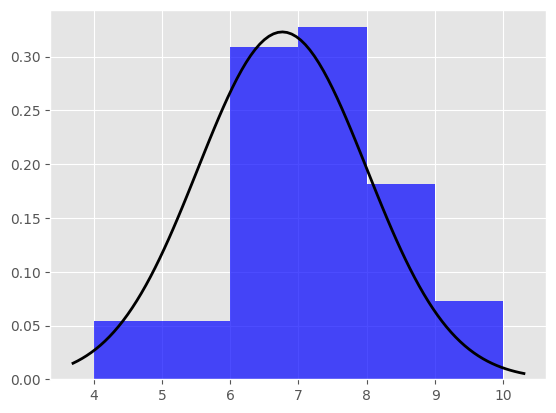

In [84]:
from scipy.stats import norm

hours_of_sleep = df["hours_of_sleep"]

mu, std = norm.fit(hours_of_sleep)

print(f"Mean: {mu:.2f}h\nStandard Deviation: {std:.2f}h")

# Plot the histogram.
plt.hist(hours_of_sleep, bins=6, density=True, alpha=0.7, color="blue")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)

plt.show()

# Histograms Detailing Smaller Quantitative Variables Per Device Usage Group


## Category: < 30 minutes


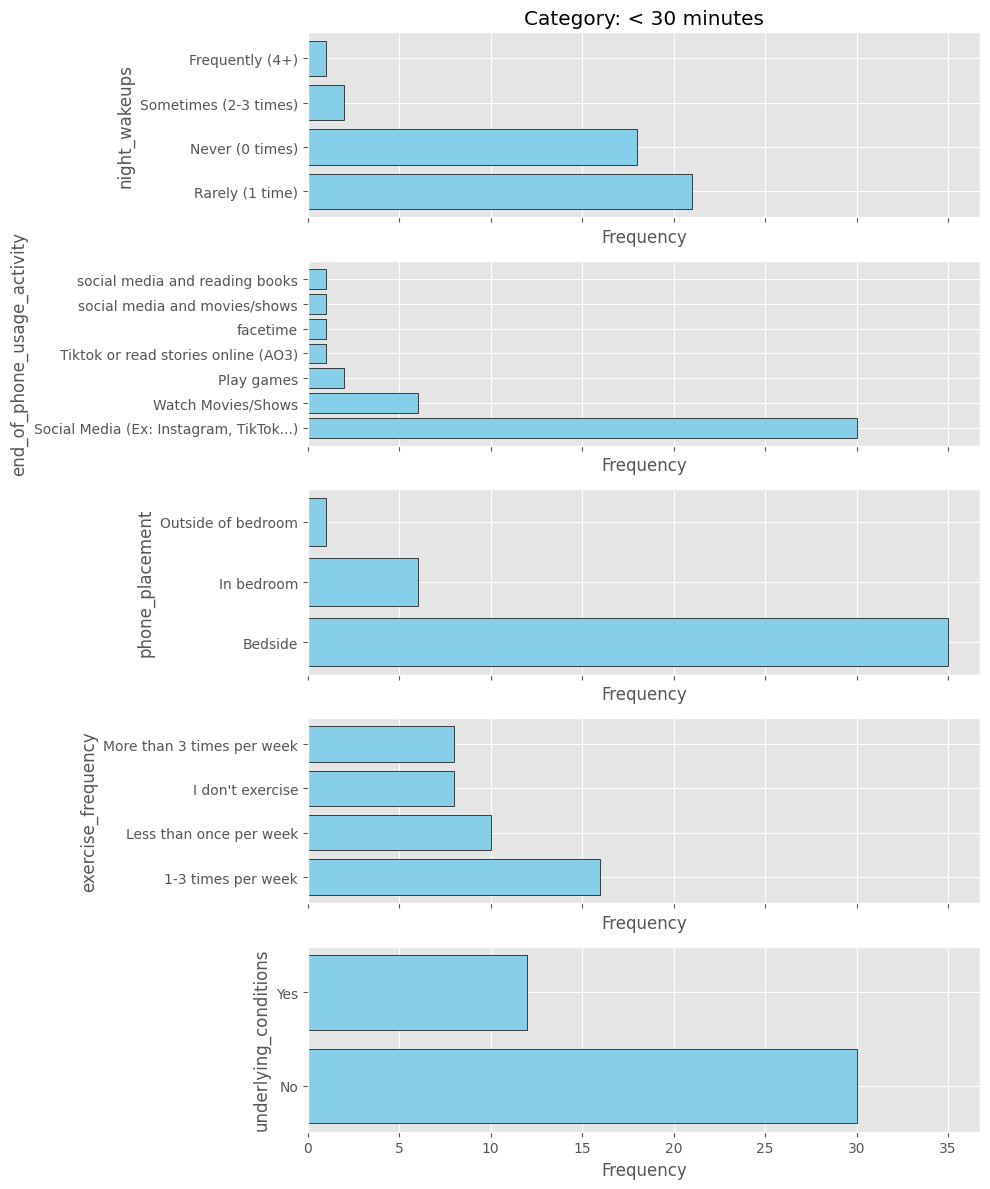

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category = "< 30 minutes"

# Define the DataFrame directly
data = {
    "end_of_phone_usage_activity",
    "phone_placement",
    "night_wakeups",
    "underlying_conditions",
    "exercise_frequency"
}

# Plot the vertical bar graphs for each question
fig, axes = plt.subplots(len(data), figsize=(10, 12), sharex=True)

axes[0].set_title(f"Category: {category}")

for i, question in enumerate(data):
    filtered_df = df[df["end_of_phone_usage"] == category]

    # Count occurrences of each option in the current column
    counts = filtered_df[question].value_counts()
    
    axes[i].barh(counts.index, counts.values, color="skyblue", edgecolor='black')
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel(question)
    
plt.tight_layout()
plt.show()

## Category: 30 minutes - 1 hour


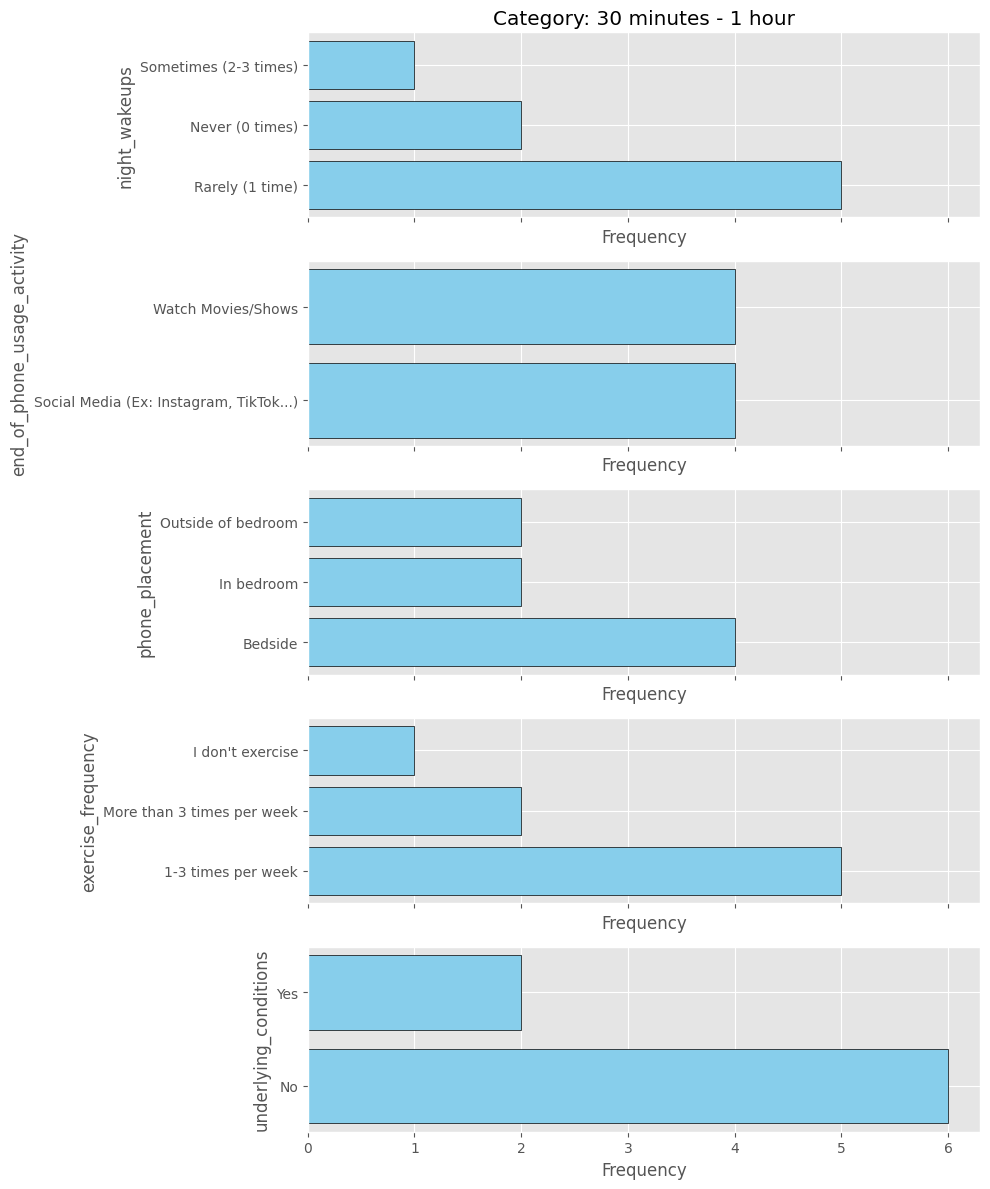

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category = "30 minutes - 1 hour"

# Define the DataFrame directly
data = {
    "end_of_phone_usage_activity",
    "phone_placement",
    "night_wakeups",
    "underlying_conditions",
    "exercise_frequency"
}

# Plot the vertical bar graphs for each question
fig, axes = plt.subplots(len(data), figsize=(10, 12), sharex=True)

axes[0].set_title(f"Category: {category}")

for i, question in enumerate(data):
    filtered_df = df[df["end_of_phone_usage"] == category].copy()  # Make a copy to avoid modifying the original DataFrame
    
    # For exercise_frequency, replace 1 with "Yes" and 0 with "No"
    if question == "underlying_conditions":
        filtered_df.loc[:, question] = filtered_df[question].replace({1: "Yes", 0: "No"})
    
    # Count occurrences of each option in the current column
    counts = filtered_df[question].value_counts()
    
    axes[i].barh(counts.index, counts.values, color="skyblue", edgecolor='black')
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel(question)
    
plt.tight_layout()
plt.show()

## Category: > 1 hour


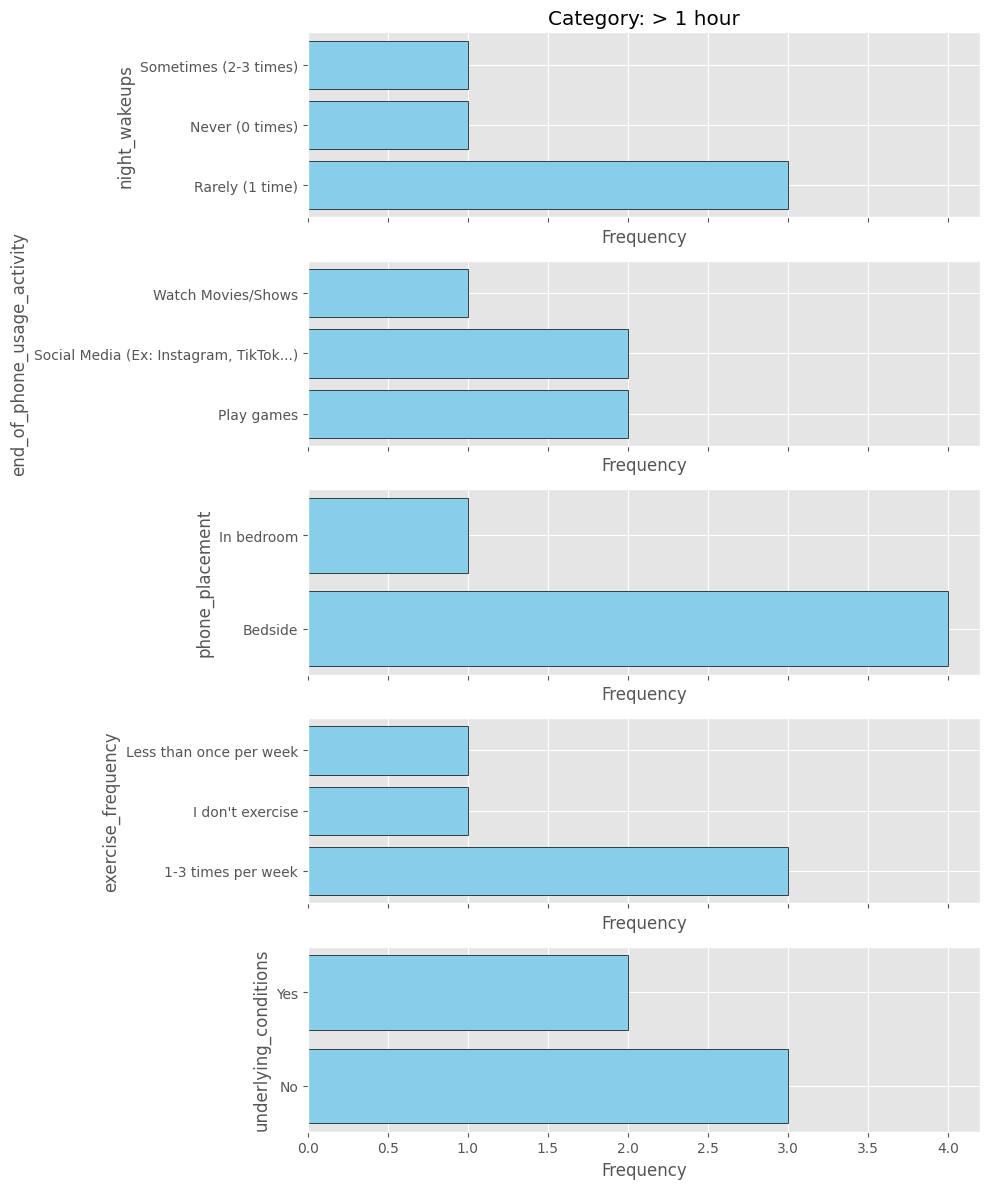

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category = "> 1 hour"

# Define the DataFrame directly
data = {
    "end_of_phone_usage_activity",
    "phone_placement",
    "night_wakeups",
    "underlying_conditions",
    "exercise_frequency"
}

# Plot the vertical bar graphs for each question
fig, axes = plt.subplots(len(data), figsize=(10, 12), sharex=True)

axes[0].set_title(f"Category: {category}")

for i, question in enumerate(data):
    filtered_df = df[df["end_of_phone_usage"] == category].copy()  # Make a copy to avoid modifying the original DataFrame
    
    # For exercise_frequency, replace 1 with "Yes" and 0 with "No"
    if question == "underlying_conditions":
        filtered_df.loc[:, question] = filtered_df[question].replace({1: "Yes", 0: "No"})
    
    # Count occurrences of each option in the current column
    counts = filtered_df[question].value_counts()
    
    axes[i].barh(counts.index, counts.values, color="skyblue", edgecolor='black')
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel(question)
    
plt.tight_layout()
plt.show()

# Heatmap Graph


In [88]:
# Convert the 'underlying_conditions' column to a boolean
df["underlying_conditions"] = df["underlying_conditions"].apply(
  lambda x: False if x == "No" else True
)

# One-hot encode certain columns.
df_encoded = pd.get_dummies(
  df,
  columns=[
    "end_of_phone_usage",
    "end_of_phone_usage_activity",
    "phone_placement",
    "time_to_fall_asleep",
    "night_wakeups",
    "exercise_frequency",
  ],
)

# TODO: Handle sleep_environment later (currently being dropped)
df_encoded = df_encoded.drop(columns=["sleep_environment"], axis=1)

# replace spaces with underscores and make lowercase
df_encoded.columns = df_encoded.columns.str.replace(" ", "_").str.lower()

# Rename Columns
df_encoded = df_encoded.rename(
  columns={
    "end_of_phone_usage_30_minutes_-_1_hour": "end_of_phone_usage_between_30_minutes_and_1_hour",
    "end_of_phone_usage_<_30_minutes": "end_of_phone_usage_less_than_30_minutes",
    "end_of_phone_usage_>_1_hour": "end_of_phone_usage_more_than_1_hour",
    "end_of_phone_usage_activity_browsing_social_media_(ex:_instagram,_tiktok...)": "end_of_phone_usage_activity_browsing_social_media",
    "time_to_fall_asleep_30_minutes_-_1_hour": "time_to_fall_asleep_between_30_minutes_and_1_hour",
    "time_to_fall_asleep_<_30_minutes": "time_to_fall_asleep_less_than_30_minutes",
    "time_to_fall_asleep_>_1_hour": "time_to_fall_asleep_more_than_1_hour",
    "night_wakeups_never_(0_times)": "night_wakeups_never_(0)",
    "night_wakeups_rarely_(1_time)": "night_wakeups_rarely_(1)",
    "night_wakeups_sometimes_(2-3_times)": "night_wakeups_sometimes_(2-3)",
    "exercise_frequency_i_don't_exercise": "exercise_frequency_never",
  }
)

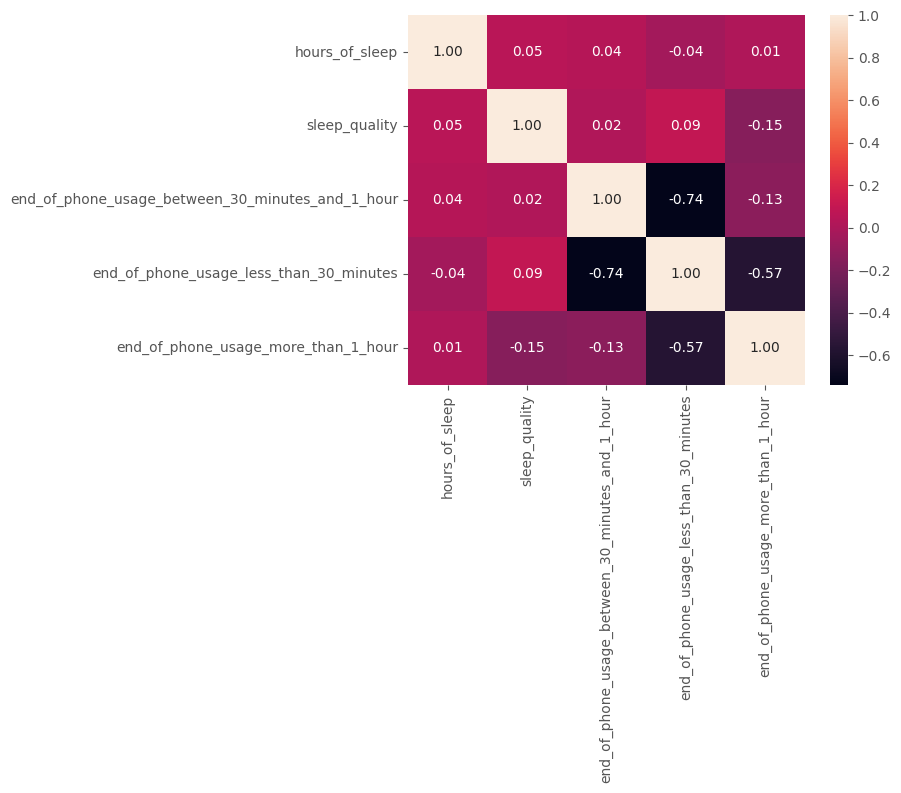

In [89]:
# Heatmap of correlations between hours of sleep, sleep quality, and phone usage before bed
df_corr = df_encoded[
  [
    "hours_of_sleep",
    "sleep_quality",
    "end_of_phone_usage_between_30_minutes_and_1_hour",
    "end_of_phone_usage_less_than_30_minutes",
    "end_of_phone_usage_more_than_1_hour",
  ]
].corr()

heatmap = sns.heatmap(df_corr, annot=True, fmt=".2f")

# Calculations

## Sample Size, Mean and Standard Deviation per Device Usage Group

In [90]:
from scipy.stats import norm

# Define the categories for end_of_phone_usage
categories = ["< 30 minutes", "30 minutes - 1 hour", "> 1 hour"]

# Iterate over each category of end_of_phone_usage
for category in categories:
    # Filter the dataframe for the current category
    filtered_df = df[df["end_of_phone_usage"] == category]

    # Calculate sample size, mean, and standard deviation
    n = len(filtered_df)
    mu, std = norm.fit(filtered_df["hours_of_sleep"])
    
    # Print results
    print(f"Category: {category}")
    print(f"   Sample Size (n): {n}")
    print(f"   Mean (mu): {mu}")
    print(f"   Standard Deviation: {std}\n")


Category: < 30 minutes
   Sample Size (n): 42
   Mean (mu): 6.738095238095238
   Standard Deviation: 1.2546963929767045

Category: 30 minutes - 1 hour
   Sample Size (n): 8
   Mean (mu): 6.875
   Standard Deviation: 1.0532687216470449

Category: > 1 hour
   Sample Size (n): 5
   Mean (mu): 6.8
   Standard Deviation: 1.32664991614216



## Performing the T-Tests

In [97]:
from scipy.stats import ttest_ind

# Perform t-tests between pairs of categories
categories = ["< 30 minutes", "30 minutes - 1 hour", "> 1 hour"]

for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]
        
        # Filter data for the two categories
        data_cat1 = df[df["end_of_phone_usage"] == cat1]["hours_of_sleep"]
        data_cat2 = df[df["end_of_phone_usage"] == cat2]["hours_of_sleep"]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(data_cat1, data_cat2)
        
        # Print results
        print(f"T-test between `{cat1}` and `{cat2}`:")
        print(f"   T-statistic: {t_stat}")
        print(f"   P-value: {p_value}")

        # Determine the significance
        alpha = 0.05
        if p_value < alpha:
            print("The differences between group means are statistically significant.\n")
        else:
            print("There is no statistically significant difference between group means.\n")





T-test between `< 30 minutes` and `30 minutes - 1 hour`:
   T-statistic: -0.2839294311947307
   P-value: 0.7776856517484941
There is no statistically significant difference between group means.

T-test between `< 30 minutes` and `> 1 hour`:
   T-statistic: -0.10141329858930315
   P-value: 0.9196729096880304
There is no statistically significant difference between group means.

T-test between `30 minutes - 1 hour` and `> 1 hour`:
   T-statistic: 0.10378538823462011
   P-value: 0.9192077343692122
There is no statistically significant difference between group means.



# Conclusion

`A conclusion on whether your hypothesis was reasonable, and justification for your conclusion`


# Comments

## Did your method of sampling result in a random sample?

## If your sample was not a random sample, what sorts of measures could you take if you were to do this project again, to get a random sample?

## Based on the experiment, would it be appropriate to write a revised hypothesis (“in Hampsteand, 5 cars go through each yellow light.”)

## Comment on whether you think your results can be extrapolated to draw more general conclusions, perhaps on wider populations. State your opinion and then back it up with well-reasoned arguments.
